<a href="https://colab.research.google.com/github/DoCaoDuy/BaitapAI/blob/main/AI_W7_17_03_23.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [11]:
import pandas as pd 
url = 'mtcars.csv'
data = pd.read_csv(url)
data.head()


,Unnamed: 0,mpg,disp,hp,wt
0,Mazda RX4,21.0,160.0,110,2.620
1,Mazda RX4 Wag,21.0,160.0,110,2.875
2,Datsun 710,22.8,108.0,93,2.320
3,Hornet 4 Drive,21.4,258.0,110,3.215
4,Hornet Sportabout,18.7,360.0,175,3.440


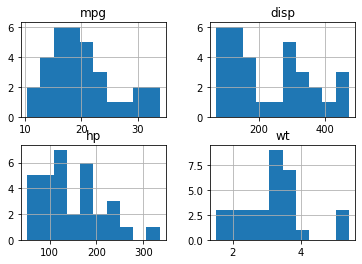

In [21]:

import seaborn as sns 
import matplotlib.pyplot as plt 

data.hist()
plt.show()

In [22]:
#moi tuong quan giua cac bien
correlation = data.corr()
print(correlation)


           mpg      disp        hp        wt
mpg   1.000000 -0.847551 -0.776168 -0.867659
disp -0.847551  1.000000  0.790949  0.887980
hp   -0.776168  0.790949  1.000000  0.658748
wt   -0.867659  0.887980  0.658748  1.000000


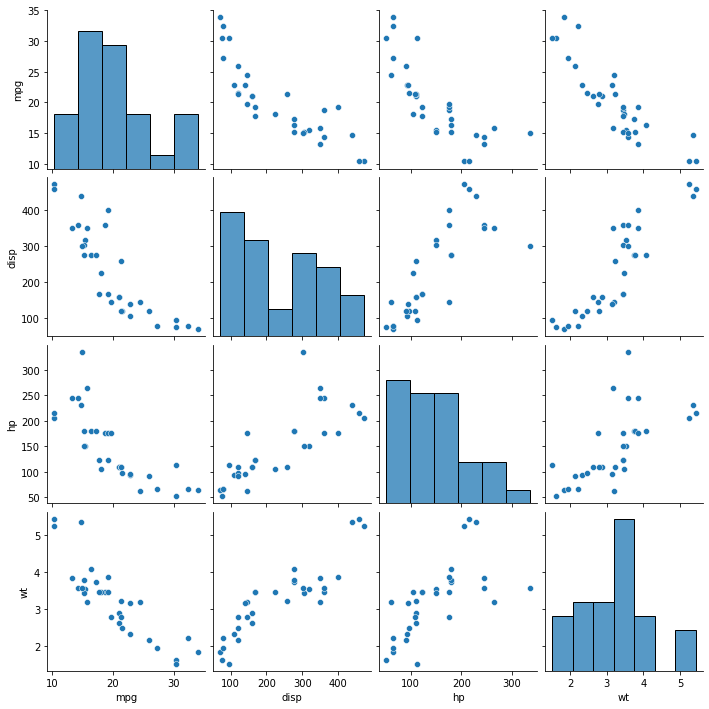

In [23]:
#ve bieu do su khac biet giua cac bien 
sns.pairplot(data)

<Axes: >

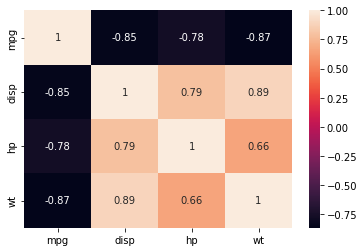

In [24]:
sns.heatmap(correlation,annot=True)

/usr/local/lib/python3.9/dist-packages/pandas/plotting/_matplotlib/core.py:1114: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(


<Axes: xlabel='wt', ylabel='mpg'>

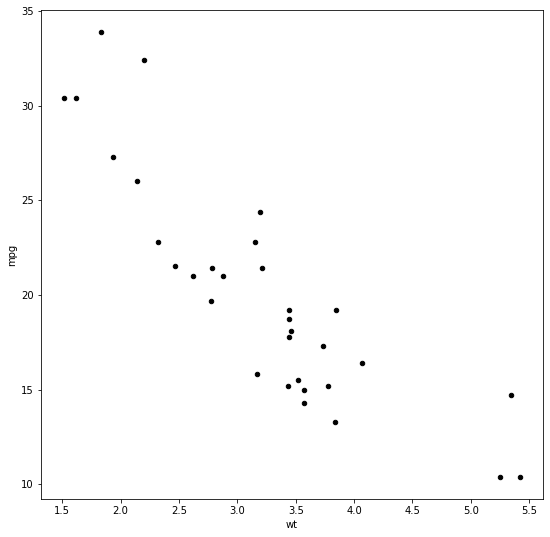

In [26]:
data.plot(kind='scatter',x='wt',y='mpg',figsize=(9,9),color='black')

In [46]:
from sklearn import linear_model
model = linear_model.LinearRegression()
model.fit(X=pd.DataFrame(data['wt']),
          y=data['mpg'])
print('Gia tri Intercept la :',model.intercept_)
print('Gia tri Coeffient la :',model.coef_)




Gia tri Intercept la : 37.28512616734204
Gia tri Coeffient la : [-5.34447157]


In [42]:
model.score(X=pd.DataFrame(data['wt']),y=data['mpg'])
#Ham tinh do chinh xac 

0.7528327936582646

/usr/local/lib/python3.9/dist-packages/pandas/plotting/_matplotlib/core.py:1114: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(


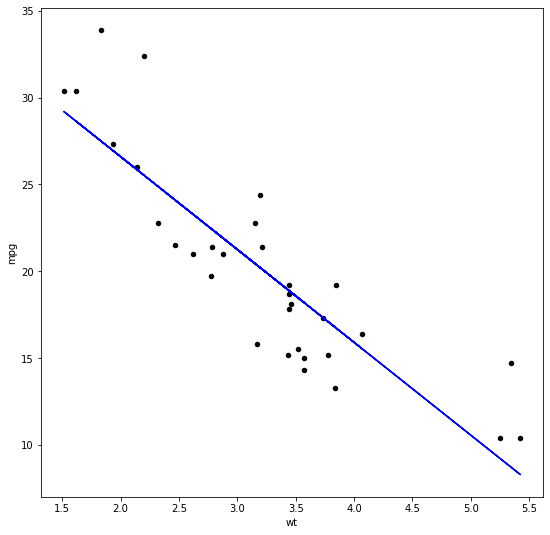

In [47]:
data.plot(kind='scatter',x='wt',y='mpg',figsize=(9,9),color='black')
y_pred=model.predict(X=pd.DataFrame(data['wt']))
plt.plot(data['wt'],y_pred,color='blue')

In [54]:
# HOI QUY BAC 2 
model = linear_model.LinearRegression()
X = pd.DataFrame([data['wt'],data['wt']**2]).T # T : chuyen vi 
model.fit(X,y=data['mpg'])
print('He so Intercept la:',model.intercept_)
print('He so Coeffient la:',model.coef_)
print('Do chinh xac cua mo hinh :',model.score(X,y=data['mpg']))

He so Intercept la: 49.93081094945181
He so Coeffient la: [-13.38033708   1.17108689]
Do chinh xac cua mo hinh : 0.8190613581384094


/usr/local/lib/python3.9/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/pandas/plotting/_matplotlib/core.py:1114: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(


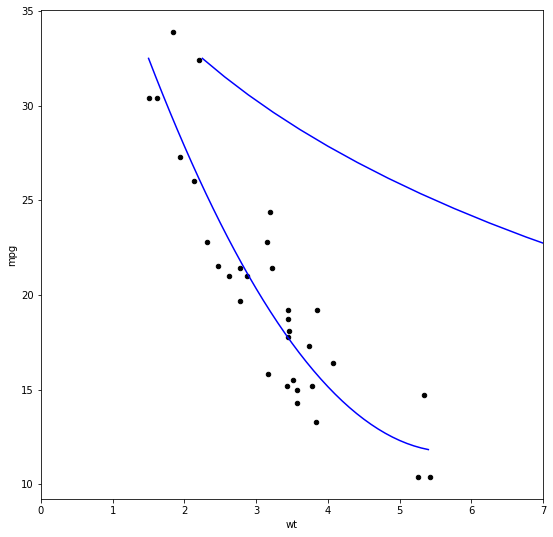

In [65]:
import numpy as np
range = np.arange(1.5,5.5,0.1)
X_range = pd.DataFrame([range,range**2]).T
y_pred = model.predict(X_range)
data.plot(kind='scatter',x = 'wt',y = 'mpg',figsize=(9,9),color='black',xlim=(0,7))
plt.plot(X_range,y_pred,color='blue')